# Titanic_Train Project

Here we are going to predict the data of Survived Column in Titanic_Train dataset

# Importing required Libraries

In [3]:
import warnings
warnings.simplefilter("ignore")

# Loading the Dataset

In [92]:
import pandas as pd
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
df.shape

(891, 12)

dataset has 891 rows and 12 columns

# Data Preparation

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Here we can see there are some null values in the column Age

Want to check outliers since there is huge difference in Fare

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here we can observe that there is some categorical value in certain columns.

In [94]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null values are present in 3 columns

In [95]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# EDA

# Univariate Analysis

In [27]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

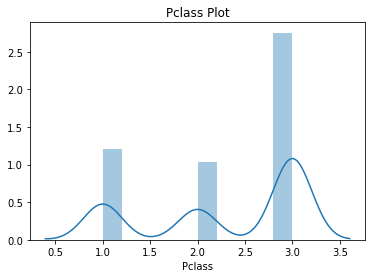

In [29]:
sns.distplot(df['Pclass'])
plt.title("Pclass Plot")
plt.show()

The data is not normally distributed

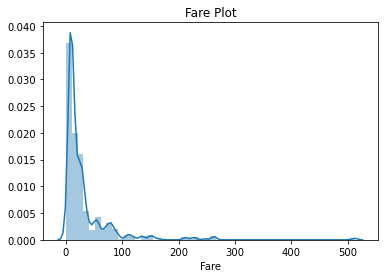

In [30]:
sns.distplot(df['Fare'])
plt.title("Fare Plot")
plt.show()

The data is not normally distributed

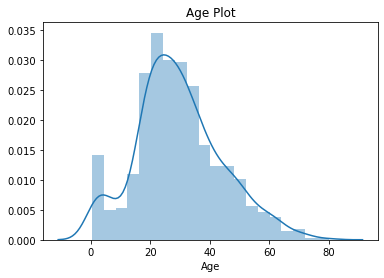

In [31]:
sns.distplot(df['Age'])
plt.title("Age Plot")
plt.show()

The data is not normally distributed

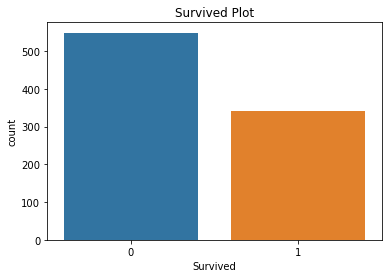

In [32]:
sns.countplot(df['Survived'])
plt.title("Survived Plot")
plt.show()

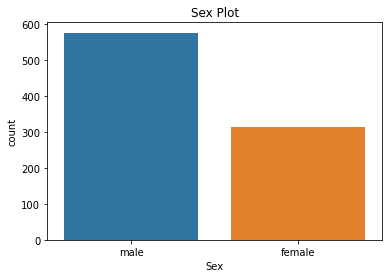

In [65]:
sns.countplot(df['Sex'])
plt.title("Sex Plot")
plt.show()

# Bivariate Analysis

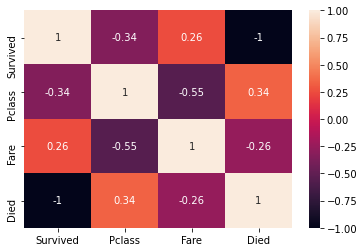

In [66]:
corr = df.corr()
sns.heatmap(corr, annot = True)
plt.show()

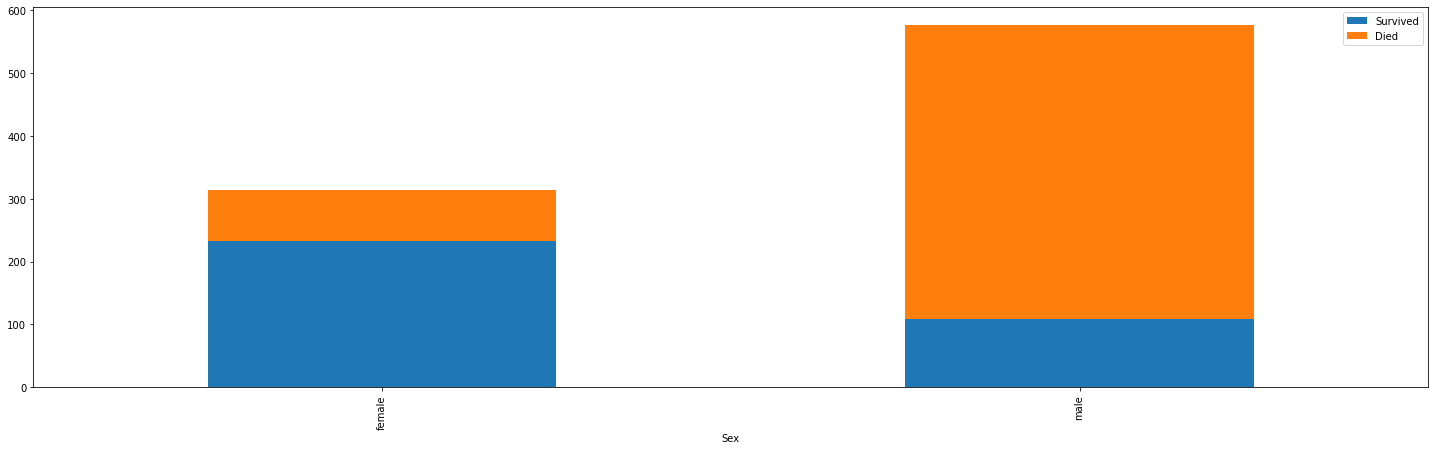

In [44]:
#Visulaizing the Survived data among Male vs Female 

df['Died'] = 1 - df['Survived']
df.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),
                                                          stacked=True


Here we can observe that female passengers were highly Survived in numbers when compared to male  

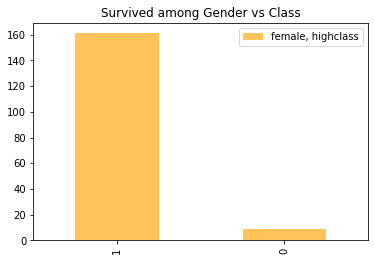

In [57]:
#Survived among gender vs Class

a=fig.add_subplot(141)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='orange', alpha=alpha_level)
a.set_xticklabels(["Survived", "Died"], rotation=0)
a.set_xlim(-1, len(female_highclass))
plt.title("Survived among Gender vs Class"); plt.legend(loc='best')



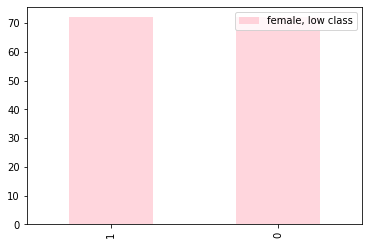

In [58]:
b=fig.add_subplot(142, sharey=a)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
b.set_xticklabels(["Died","Survived"], rotation=0)
b.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')


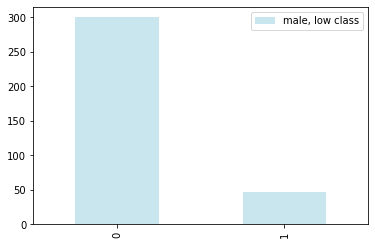

In [60]:
c=fig.add_subplot(143, sharey=a)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
c.set_xticklabels(["Died","Survived"], rotation=0)
c.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

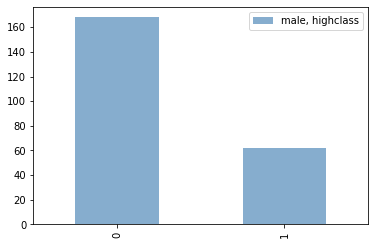

In [59]:

d=fig.add_subplot(144, sharey=a)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
d.set_xticklabels(["Died","Survived"], rotation=0)
d.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

In [61]:
# Column which has only objects

df.dtypes[df.dtypes.map(lambda x: x == 'object')]


Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

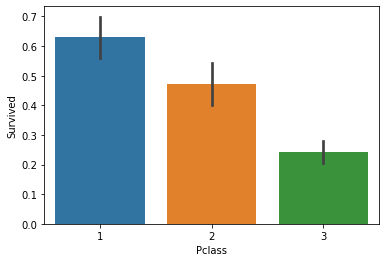

In [75]:
sns.barplot(x='Pclass', y='Survived', data=df)


Here we can observe that class contributes to the survival of people especially in class 1

,Survived,Pclass,Name,Sex,Ticket,Fare,Cabin,Died
0,0,3,"Braund, Mr. Owen Harris",NaN,A/5 21171,7.2500,NaN,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,PC 17599,71.2833,C85,0
2,1,3,"Heikkinen, Miss. Laina",NaN,STON/O2. 3101282,7.9250,NaN,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,113803,53.1000,C123,0
4,0,3,"Allen, Mr. William Henry",NaN,373450,8.0500,NaN,1
...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",NaN,211536,13.0000,NaN,1
887,1,1,"Graham, Miss. Margaret Edith",NaN,112053,30.0000,B42,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,W./C. 6607,23.4500,NaN,1
889,1,1,"Behr, Mr. Karl Howell",NaN,111369,30.0000,C148,0


In [97]:
df.dtypes[df.dtypes.map(lambda x: x == 'object')]


Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [98]:
genders = {"male": 0, "female": 1}
data = [df]

for i in data:
    i['Sex'] = i['Sex'].map(genders)

In [99]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [104]:
numbers = {"S": 0, "C": 1, "Q": 3}
data = [df]

for i in data:
    i['Embarked'] = i['Embarked'].map(numbers)

In [118]:
df = df.drop(['Age','Embarked'], axis=1)

In [121]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
dtype: int64

# Machine Learning Model

In [122]:
X_train = df.drop("Survived", axis=1)
Y_train = df["Survived"]
X_test  = df.drop("PassengerId", axis=1).copy()

In [123]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

# Stochastic Gradient Descent (SGD):

In [129]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
print({acc_sgd*100})

{3838.0000000000005}


# Random Forest

In [130]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print({acc_random_forest*100})

{9989.0}


# Logistic Regression

In [131]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print({acc_log*100})

{7956.999999999999}


# Serialization

In [132]:
import joblib
joblib.dump(acc_log, "TitanicTrainProject.pkl")

['TitanicTrainProject.pkl']